# Kernel Principal Component Analysis (kPCA)

Let $k(\mathbf{x}, \mathbf{y})$ be a kernel. For data $\mathbf{v}_1, \ldots, \mathbf{v}_N$, the kernel matrix $\mathbf{K}$ has $(i,j)$ entry equal to $k(\mathbf{v}_i, \mathbf{v}_j)$. Kernel Principal Component Analysis calculates the $K$ largest eigenvalues $\nu_k$ and eigenvectors $\mathbf{w}_k$ of $(\mathbf{I} - \frac{1}{N} \mathbf{E}) \mathbf{K} (\mathbf{I} - \frac{1}{N} \mathbf{E})$, where $\mathbf{I}$ is the $N \times N$ identity matrix and $\mathbf{E}$ is the $N \times N$ matrix with each entry being equal to one and $\mathbf{w}_k$ has length $\sqrt{\nu_k}$. In the principal subspace the $i^\textrm{th}$ coordinate of the transformed sample $\mathbf{v}_j$ is given by
\begin{equation}
\frac{1}{\nu_i} \mathbf{w}_i^T \left( \begin{array}{c} k(\mathbf{v}_1, \mathbf{v}_j) \\ \vdots \\ k(\mathbf{v}_N, \mathbf{v}_j) \end{array} \right).
\end{equation}

This definition is due to the derivation from an inner product in a higher dimensional space (see first example below). In other definitions the factors $(\mathbf{I} - \frac{1}{N} \mathbf{E})$ are incorporated into the kernel matrix.

Experiment with different kernels and their parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

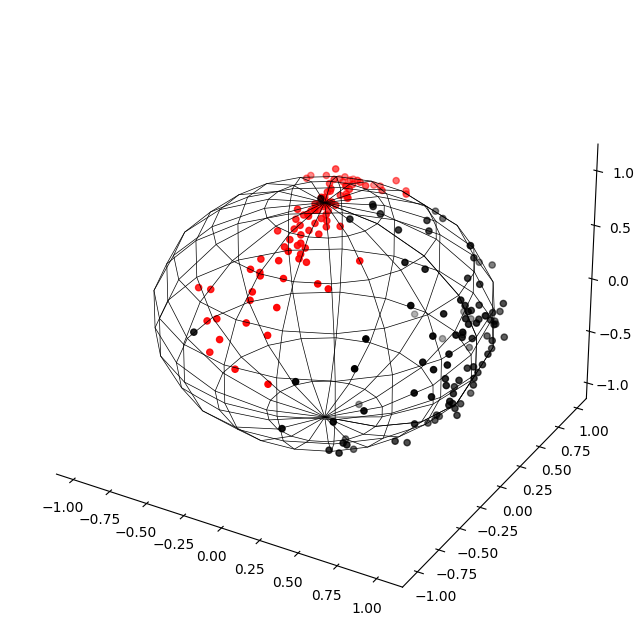

In [2]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

# Draw unit sphere.
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="k", linewidths = 0.5)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

N = 100
# Generate and display one set of data.
rng = np.random.default_rng()
data1 = rng.multivariate_normal([0, 0], [[0.3,0],[0, 0.3]], N)
noise = rng.multivariate_normal([0, 0, 0], 0.001 * np.identity(3),N)
data1x = np.multiply(np.cos(data1[:,0]), np.cos(data1[:,1])) + noise[:,0]
data1y = np.multiply(np.cos(data1[:,0]), np.sin(data1[:,1])) + noise[:,1]
data1z = np.sin(data1[:,0]) + noise[:,2]
ax.scatter3D(data1x, data1y, data1z, c = 'k')
# Generate and display another set of data.
data2 = rng.multivariate_normal([1.5, -1.5],[[0.3, 0], [0, 0.1]],N)
noise = rng.multivariate_normal([0, 0, 0], 0.001 * np.identity(3),N)
data2x = np.multiply(np.cos(data2[:,0]), np.cos(data2[:,1])) + noise[:,0]
data2y = np.multiply(np.cos(data2[:,0]), np.sin(data2[:,1])) + noise[:,1]
data2z = np.sin(data2[:,0]) + noise[:,2]
ax.scatter3D(data2x, data2y, data2z, c = 'r')
plt.show()

In [3]:
# Gather data into one array.
datax = np.append(data1x, data2x)
datay = np.append(data1y, data2y)
dataz = np.append(data1z, data2z)
X = np.column_stack((datax,datay,dataz))
# Generate labels.
labels = np.repeat(0,N)
labels = np.append(labels, np.repeat(1,N))
# Permute data and labels.
perm = rng.permutation(2*N)
X = X[perm,:]
labels = labels[perm]

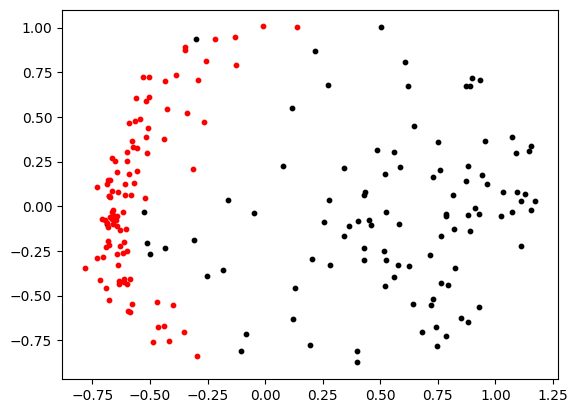

In [4]:
# Augment data by fourth dimension.
Y = np.column_stack((X, np.sum(np.square(X),axis=1)))
# Initialize Principal Component Analysis
pca = PCA(n_components = 2)
# Find the principal components and transform data points
# to this subspace.
X_transformed = pca.fit_transform(Y)
fig = plt.figure()
plt.scatter(X_transformed[labels == 0,0], X_transformed[labels == 0,1],
                c = 'k', s = 10)
plt.scatter(X_transformed[labels == 1,0], X_transformed[labels == 1,1],
                c = 'r', s = 10)
plt.show()

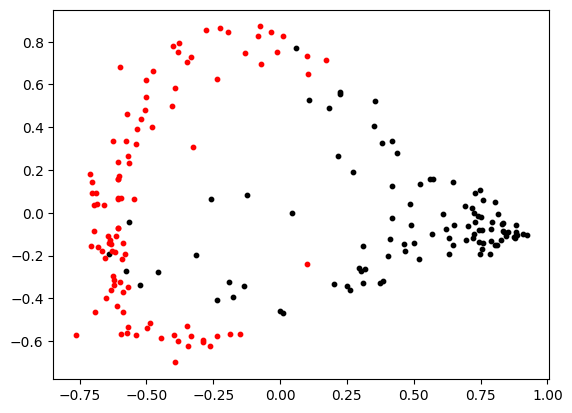

In [5]:
# Initialise kernel PCA.
# Choice of kernel: 'poly' with parameter gamma, degree and coef0.
kpca = KernelPCA(n_components=2, kernel='poly', gamma = 1,
                 degree =2, coef0 = 0.1)
# Find the principal components and transform data points
# to this subspace.
X_transformed = kpca.fit_transform(X)
fig = plt.figure()
plt.scatter(X_transformed[labels == 0,0], X_transformed[labels == 0,1],
                c = 'k', s = 10)
plt.scatter(X_transformed[labels == 1,0], X_transformed[labels == 1,1],
                c = 'r', s = 10)
plt.show()

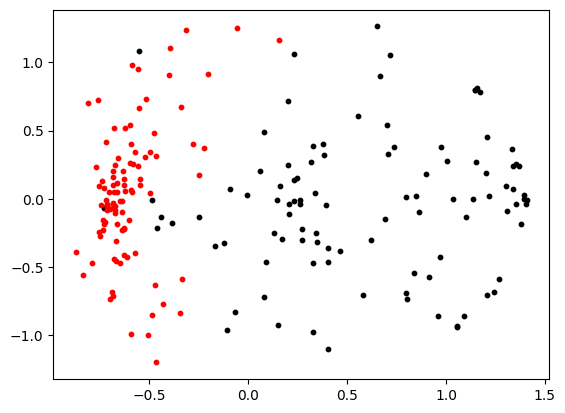

In [6]:
# Initialise kernel PCA.
# Choice of kernel: 'sigmoid' with parameter gamma and coef0.
kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma = 5,
                 coef0 = 0.5)
# Find the principal components and transform data points
# to this subspace.
X_transformed = kpca.fit_transform(X)
fig = plt.figure()
plt.scatter(X_transformed[labels == 0,0], X_transformed[labels == 0,1],
                c = 'k', s = 10)
plt.scatter(X_transformed[labels == 1,0], X_transformed[labels == 1,1],
                c = 'r', s = 10)
plt.show()

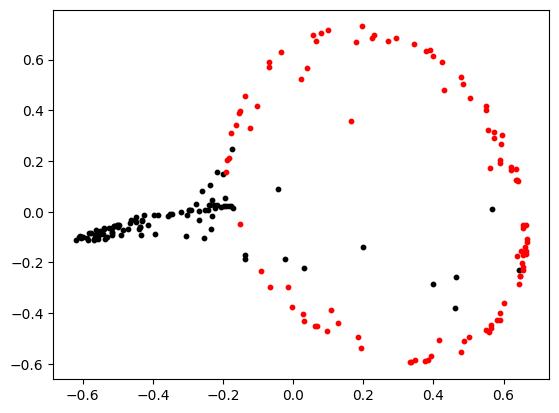

In [7]:
# Initialise kernel PCA.
# Choice of kernel: 'rbf' with parameter gamma.
kpca = KernelPCA(n_components=2, kernel='rbf', gamma = 4)
# Find the principal components and transform data points
# to this subspace.
X_transformed = kpca.fit_transform(X)
fig = plt.figure()
plt.scatter(X_transformed[labels == 0,0], X_transformed[labels == 0,1],
                c = 'k', s = 10)
plt.scatter(X_transformed[labels == 1,0], X_transformed[labels == 1,1],
                c = 'r', s = 10)
plt.show()